# MNIST Digit Classification Neural Network
---

A neural network is a system of interconnected nodes, or artificial neurons that perform some task by learning from a dataset and incrementally improving its own performance. These artificial neurons are organised into multiple layers including an input layer, where data is fed forward through the network's successive layers, until it produces some output in the final layer.

Networks "learn" by analyzing a dataset of training inputs, where each training example is classified by a label. Through a process called backpropagation, the network adjusts the "weights" connecting each neuron (which can be thought of as the synapses connecting neurons in a human brain) based on how close the output produced from traning examples, which classifies each training example, is to the actual classification of those examples. Biases for each neuron are also updated accordingly.

### The MNIST Dataset

This project produces a neural network that classifies images of handwritten digits ranged from 0-9. These images are gathered from the MNIST database - a large set of images of handwritten digits commonly used for training neural networks like this one. This is my first attempt at building a neural network from scratch and I plan to continually update this project as I improve my code.

Each image is input as a 784-dimensional vector, with each vector component representing the greyscale value of a pixel in the image. The network has one hidden layer composed of 25 neurons and a final output layer of 10 neurons. Output in the network can be viewed as the "activation" of these output neurons, or the degree to which a neuron is affected by the input of the system. For example, with an input representing the digit 0, the output neuron of index 0 (so, the first neuron) would have a higher value (or activation) associated with it, while other neurons would have comparably lower activations. 

Here are some other important features about my network:
- It uses the sigmoid activation function
- The number of epochs (a mini-batch of 100 training examples) and learning rates can be cusomised. These values are set to 800 and 1 by default.
- Currently, my network has an average training accuracy of 85%.

---

The following code implements my neural network

In [2]:
import numpy as np
import math

# Sigmoid activation function returns a value between 0 and 1
# based on the degree to which the input varies from 0
def sigmoid(x):
    if x.size == 1:
        return 1 / (1 + math.exp(-x))
    else:
        return np.array([(1 / (1 + math.exp(-i))) for i in x])

def sigmoid_derivative(x):
    if x.size == 1:
        return math.exp(-x) / ((1 + math.exp(-x))**2)
    else:
        return np.array([((math.exp(-i))/(1 + math.exp(-i))**2) for i in x])

class NNetwork:
    # The network is initialised with the training and testing sets as input
    def __init__(self, X_train, Y_train, X_test, Y_test):
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test
        
        self.input = np.zeros(784)
        self.output = np.zeros(10)
        self.y = np.zeros(10)
        
        # Weights and biases are initialised as random values between -1 and 1
        self.weights2 = np.random.uniform(low=-1.0, high=1.0, size=(25,784))
        self.weights3 = np.random.uniform(low=-1.0, high=1.0, size=(10,25))
        self.bias2 = np.random.uniform(low=-1.0, high=1.0, size=25)
        self.bias3 = np.random.uniform(low=-1.0, high=1.0, size=10)
    
    def train(self, epochs, lr):
        for i in range(epochs):
            d_weights2 = np.zeros(self.weights2.shape)
            d_weights3 = np.zeros(self.weights3.shape)
            d_bias2 = np.zeros(self.bias2.shape)
            d_bias3 = np.zeros(self.bias3.shape)
            for j in range(100):
                self.input = self.X_train[(i * 100) + j,:]
                self.y[self.Y_train[(i * 100) + j]] = 1
                self.feedforward()
                updates = self.backprop() # The gradient of the cost function
                d_weights2 += updates[0]
                d_weights3 += updates[1]
                d_bias2 += updates[2]
                d_bias3 += updates[3]
                self.y = np.zeros(10)
            d_weights2 /= 100
            d_weights3 /= 100
            d_bias2 /= 100
            d_bias3 /= 100
            
            # The average negative value of the change in the cost with respect to the change 
            # in each weight & bias for 100 training examples is calculated and added to the
            # current value of each weight and bias
            self.weights2 += -1 * lr * d_weights2
            self.weights3 += -1 * lr * d_weights3
            self.bias2 += -1 * lr * d_bias2
            self.bias3 += -1 * lr * d_bias3
        print("Training complete!")
    
    # This function classifies a single image
    def classify(self, x):
        self.input = x
        self.feedforward()
        return np.argmax(self.output)
    
    def test(self):
        acc = 0
        for i in range(10000):
            x = X_test[i,:]
            y = Y_test[i]
            yHAT = self.classify(x)
            if y == yHAT:
                acc += 1
        print("Testing accuracy: " + str((acc / 10000) * 100) + "%")
    
    # This function uses the sigmoid activation function to 
    # feed an input forward, producing the values of the neurons
    # in the second layer and the final layer
    def feedforward(self):
        self.layer2 = sigmoid(np.dot(self.input, self.weights2.T) + self.bias2)
        self.output = sigmoid(np.dot(self.layer2, self.weights3.T) + self.bias3)
    
    # This function calculates the gradient of the cost function, where each
    # component of the cost gradient is associated with a single weight or bias
    def backprop(self):
        d_weights2 = np.zeros(self.weights2.shape)
        d_weights3 = np.zeros(self.weights3.shape)
        
        d_bias2 = np.zeros(self.bias2.shape)
        d_bias3 = np.zeros(self.bias3.shape)

        d_weights2 = self.input * (sigmoid_derivative(np.dot(self.input, self.weights2.T) + self.bias2)[:, np.newaxis] * np.sum((self.weights3.T * (sigmoid_derivative(np.dot(self.layer2, self.weights3.T) + self.bias3)) * 2 * (self.output - self.y)), axis=1)[:, np.newaxis])
        d_weights3 = np.tile(self.layer2,(10,1)) * sigmoid_derivative(np.dot(self.layer2, self.weights3.T) + self.bias3)[:, np.newaxis] * (2 * (self.output - self.y))[:, np.newaxis]
        
        d_bias2 = sigmoid_derivative(np.dot(self.input, self.weights2.T) + self.bias2) * (d_bias2 + np.sum((self.weights3.T * (sigmoid_derivative(np.dot(self.layer2, self.weights3.T) + self.bias3)) * 2 * (self.output - self.y)), axis=1))
        d_bias3 = sigmoid_derivative(np.dot(self.layer2, self.weights3.T) + self.bias3) * (d_bias3 + 2 * (self.output - self.y))
        
        return d_weights2, d_weights3, d_bias2, d_bias3
        
        
        

The following code downloads the mnist dataset and converts it to input for the network. This code is based on hsjeong5's github project [MNIST-for-Numpy](https://github.com/hsjeong5/MNIST-for-Numpy).

In [8]:
import mnist

mnist.init()
X_train, Y_train, X_test, Y_test = mnist.load()
X_train = X_train / 255
X_test = X_test / 255

Download complete.
Save complete.


The following code uses the above input data to train & test the accuracy of a neural network

In [9]:
network = NNetwork(X_train, Y_train, X_test, Y_test)
network.train(600, 1)
network.test()

Training complete!
Testing accuracy: 81.8%


Run the code below to test my network on three random images

Image 5533 value: 7 Classified by network as: 7
Image 4278 value: 0 Classified by network as: 0
Image 5643 value: 2 Classified by network as: 2
Image 9791 value: 0 Classified by network as: 0



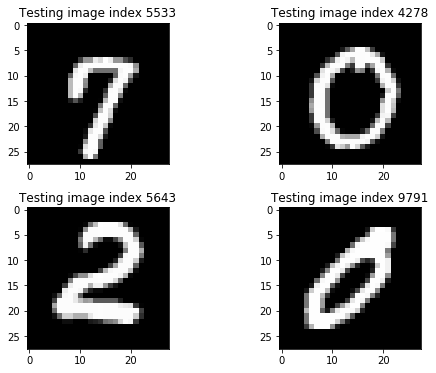

In [15]:
import matplotlib.pyplot as plt

imgIndex = np.random.randint(low=0, high=10000, size=4)

fig = plt.figure(figsize=(8,6))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(221)
ax1.set_title("Testing image index " + str(imgIndex[0]))
plt.imshow(X_test[imgIndex[0]].reshape(28, 28), cmap='gray')

ax2 = fig.add_subplot(222)
ax2.set_title("Testing image index " + str(imgIndex[1]))
plt.imshow(X_test[imgIndex[1]].reshape(28, 28), cmap='gray')

ax3 = fig.add_subplot(223)
ax3.set_title("Testing image index " + str(imgIndex[2]))
plt.imshow(X_test[imgIndex[2]].reshape(28, 28), cmap='gray')

ax4 = fig.add_subplot(224)
ax4.set_title("Testing image index " + str(imgIndex[3]))
plt.imshow(X_test[imgIndex[3]].reshape(28, 28), cmap='gray')

print("Image " + str(imgIndex[0]) + " value: " + str(Y_test[imgIndex[0]]) + " Classified by network as: " + str(network.classify(X_test[imgIndex[0],:])))
print("Image " + str(imgIndex[1]) + " value: " + str(Y_test[imgIndex[1]]) + " Classified by network as: " + str(network.classify(X_test[imgIndex[1],:])))
print("Image " + str(imgIndex[2]) + " value: " + str(Y_test[imgIndex[2]]) + " Classified by network as: " + str(network.classify(X_test[imgIndex[2],:])))
print("Image " + str(imgIndex[3]) + " value: " + str(Y_test[imgIndex[3]]) + " Classified by network as: " + str(network.classify(X_test[imgIndex[3],:])))
print()

plt.show()